In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("hasibur013/diabetes-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.93k/8.93k [00:00<00:00, 11.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hasibur013/diabetes-dataset/versions/1


In [3]:
df = pd.read_csv(f'{path}/diabetes_dataset.csv')

# Data Analysis and Preprocessing

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [8]:
bmi_zero = df[df['BMI'] == 0]
print("Number of rows where BMI is zero:", len(bmi_zero))
print('\n')
print(bmi_zero)

Number of rows where BMI is zero: 11


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8      125             96              0        0  0.0   
49             7      105              0              0        0  0.0   
60             2       84              0              0        0  0.0   
81             2       74              0              0        0  0.0   
145            0      102             75             23        0  0.0   
371            0      118             64             23       89  0.0   
426            0       94              0              0        0  0.0   
494            3       80              0              0        0  0.0   
522            6      114              0              0        0  0.0   
684            5      136             82              0        0  0.0   
706           10      115              0              0        0  0.0   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54    

In [9]:
cols = ['BMI' , 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin']

for col in cols:
    zero_counts = (df[col]==0).sum()
    print(f"Number of rows where {col} is zero: {zero_counts}")

Number of rows where BMI is zero: 11
Number of rows where Glucose is zero: 5
Number of rows where BloodPressure is zero: 35
Number of rows where SkinThickness is zero: 227
Number of rows where Insulin is zero: 374


Dropping too many values is not a good practice because it can lead to significant data loss and reduce the quality of the dataset. In this dataset, it is better to replace zero values with the median, especially for features like SkinThickness, where missing or unrecorded values are common in medical reports. Using the median helps avoid the impact of outliers and maintains the integrity of the dataset without removing valuable information.

In [10]:
for col in cols:
    median_value = df[df[col] != 0][col].median() #get median value where value is not equel 0
    df.loc[df[col] == 0, col] = median_value #replace those values into 0 value places
    print(f"replace {col} zeros with median value: {median_value}")

replace BMI zeros with median value: 32.3
replace Glucose zeros with median value: 117.0
replace BloodPressure zeros with median value: 72.0
replace SkinThickness zeros with median value: 29.0
replace Insulin zeros with median value: 125.0


In [11]:
for col in cols:
    zero_count = (df[col]== 0).sum()
    print(f"Number of rows where {col} is zero: {zero_count}")

Number of rows where BMI is zero: 0
Number of rows where Glucose is zero: 0
Number of rows where BloodPressure is zero: 0
Number of rows where SkinThickness is zero: 0
Number of rows where Insulin is zero: 0


In [12]:
cols_2 = ['DiabetesPedigreeFunction' , 'Age']

for col in cols_2:
    zero_values = (df[col]==0).sum()
    print(f"Number of rows where {col} is zero: {zero_values}")

Number of rows where DiabetesPedigreeFunction is zero: 0
Number of rows where Age is zero: 0


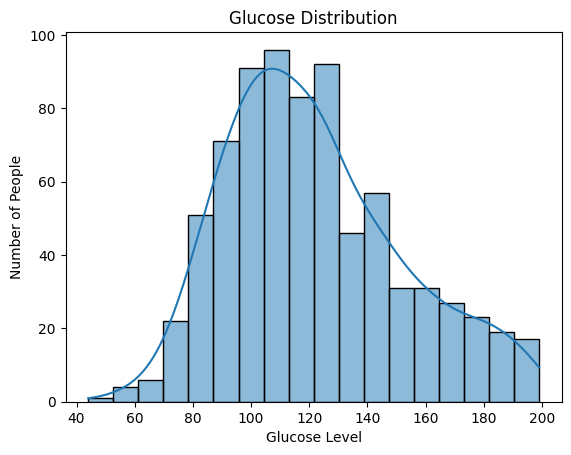

In [13]:
sns.histplot(df['Glucose'], kde=True)
plt.title('Glucose Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Number of People')
plt.show()

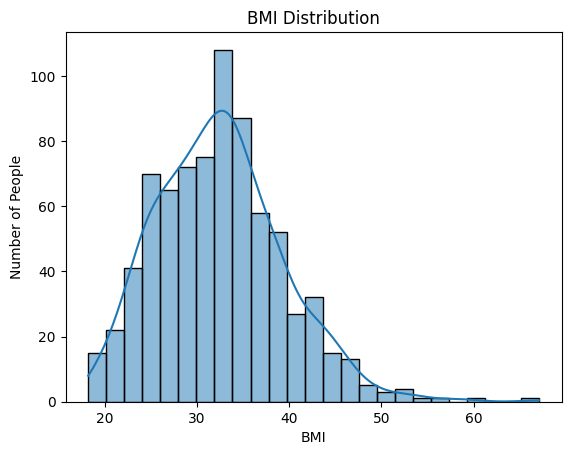

In [14]:
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Number of People')
plt.show()

👩‍🏫 What You’re Seeing
📦 Two Boxes = Two Groups:
Left box (0) → People without diabetes

Right box (1) → People with diabetes

🔢 Y-Axis = Glucose Levels
It goes from about 40 to 200.

That’s how much sugar is in the blood.

✅ 1. The Line Inside the Box (the Median):
Left box: around 110

Right box: around 140

➤ People with diabetes tend to have higher glucose levels

✅ 2. The Box (middle 50% of people):
It shows where most people are.

Box for people with diabetes is higher and wider, meaning:

Their glucose levels are usually higher

There's more variation

✅ 3. The Whiskers (lines above & below the box):
Show the range of glucose values, except for outliers.

People without diabetes can have glucose as low as 50–60

People with diabetes usually stay above 90–100

✅ 4. The Dots (⚫ Outliers):
These are people whose glucose is much higher or lower than average

In the left group (no diabetes), some have glucose over 180 — rare, but happens.

In the right group (with diabetes), fewer outliers because their high values are more normal in that group.

👶 Super Simple Summary:
People with diabetes (right box) usually have higher blood sugar, and the box proves it.
Most of their values are between 120 and 180,
while people without diabetes are mostly between 90 and 130.

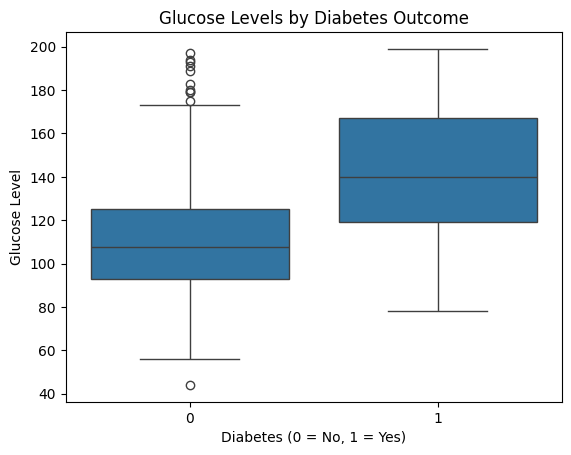

In [15]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Glucose Level')
plt.show()


👩‍🏫 What it shows:

Left = people without diabetes

Right = people with diabetes

But now, instead of a box, it shows a shape

Wider parts = more people have that value

Narrow parts = fewer people

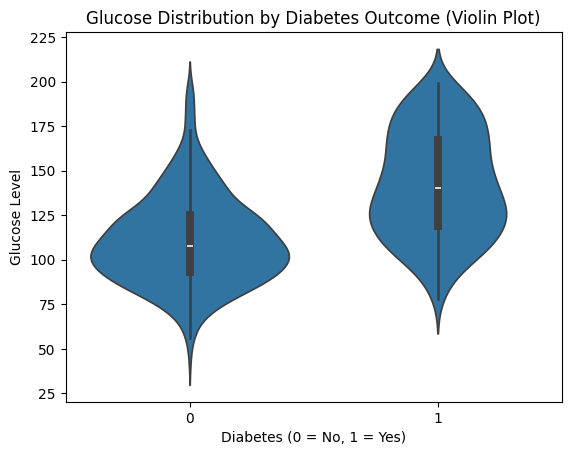

In [16]:
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Distribution by Diabetes Outcome (Violin Plot)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Glucose Level')
plt.show()


| Feature | If the right violin is taller or fatter | What it means             |
| ------- | --------------------------------------- | ------------------------- |
| BMI     | More diabetics have higher BMI          | Obesity is a risk factor  |
| Age     | More diabetics are older                | Risk increases with age   |
| Insulin | Might show mixed results                | Insulin levels vary a lot |


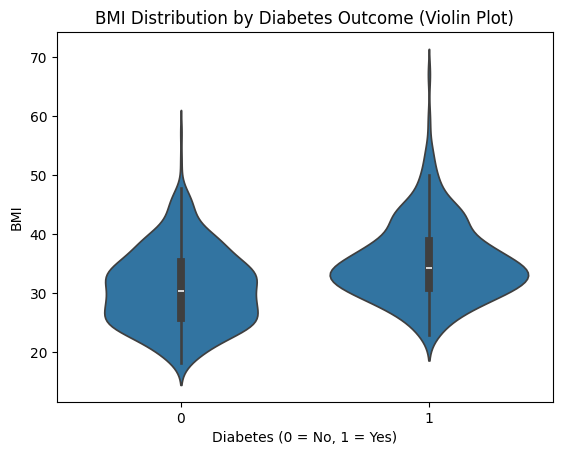

In [17]:
sns.violinplot(x='Outcome', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Outcome (Violin Plot)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


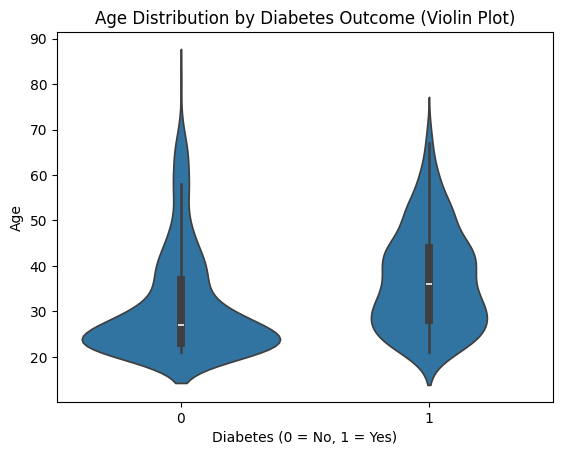

In [18]:
sns.violinplot(x='Outcome', y='Age', data=df)
plt.title('Age Distribution by Diabetes Outcome (Violin Plot)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


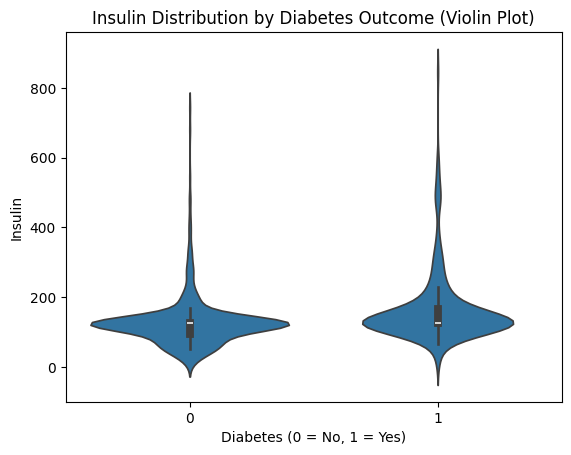

In [19]:
sns.violinplot(x='Outcome', y='Insulin', data=df)
plt.title('Insulin Distribution by Diabetes Outcome (Violin Plot)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Insulin')
plt.show()


| Feature     | Observation                              | What It Means                                 |
| ----------- | ---------------------------------------- | --------------------------------------------- |
| **Glucose** | Right side (diabetes) is taller & fatter | Diabetics have higher glucose                 |
| **BMI**     | Right side is taller                     | Diabetics tend to have higher BMI             |
| **Age**     | Right side is higher                     | Older people are more likely to have diabetes |
| **Insulin** | Maybe unclear, more spread               | Insulin levels vary a lot, still useful       |


I used violin plots to compare features between people with and without diabetes.

For Glucose, the distribution for diabetic patients was much higher and wider, showing that high glucose levels are strongly associated with diabetes.

For BMI, diabetic patients also had a wider and higher distribution, suggesting that higher BMI (obesity) may be a contributing factor.

The Age plot showed that people with diabetes tend to be older.

For Insulin, the distribution was more spread out and less clear, but still showed some difference in median values.

In [20]:
print("Glucose vs Outcome:", df['Glucose'].corr(df['Outcome']))
print("BMI vs Outcome:", df['BMI'].corr(df['Outcome']))
print("Age vs Outcome:", df['Age'].corr(df['Outcome']))
print("Insulin vs Outcome:", df['Insulin'].corr(df['Outcome']))
print("BloodPressure vs Outcome:", df['BloodPressure'].corr(df['Outcome']))
print("SkinThickness vs Outcome:", df['SkinThickness'].corr(df['Outcome']))
print("Pregnancies vs Outcome:", df['Pregnancies'].corr(df['Outcome']))
print("DiabetesPedigreeFunction vs Outcome:", df['DiabetesPedigreeFunction'].corr(df['Outcome']))


Glucose vs Outcome: 0.49278240391502587
BMI vs Outcome: 0.31203833867711084
Age vs Outcome: 0.23835598302719754
Insulin vs Outcome: 0.20379034224454592
BloodPressure vs Outcome: 0.1657229130805763
SkinThickness vs Outcome: 0.2148732193919897
Pregnancies vs Outcome: 0.22189815303398613
DiabetesPedigreeFunction vs Outcome: 0.1738440656529596


/tmp/ipython-input-956885269.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corr_df, x='Correlation with Outcome', y='Feature', palette='coolwarm')


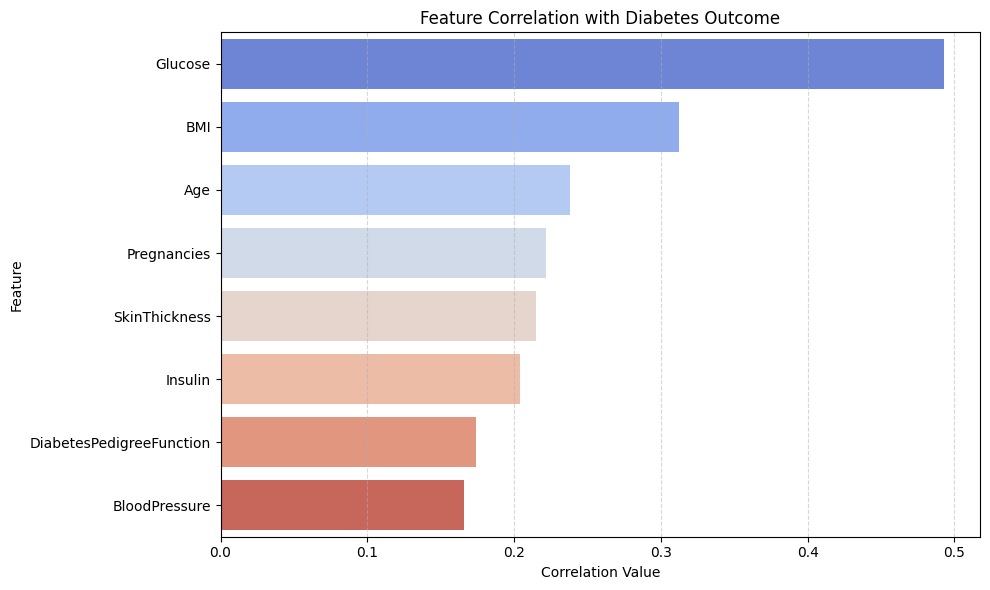

In [21]:
features = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure',
            'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']

# Compute correlations with 'Outcome'
correlations = [df[feature].corr(df['Outcome']) for feature in features]

# Create a DataFrame for plotting
corr_df = pd.DataFrame({
    'Feature': features,
    'Correlation with Outcome': correlations
}).sort_values(by='Correlation with Outcome', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df, x='Correlation with Outcome', y='Feature', palette='coolwarm')
plt.title('Feature Correlation with Diabetes Outcome')
plt.xlabel('Correlation Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

BMI < 18.5 → Underweight

18.5 ≤ BMI ≤ 24.9 → Normal

25 ≤ BMI ≤ 29.9 → Overweight

BMI ≥ 30 → Obese

In [22]:
# Define BMI categories based on standard WHO cutoffs
bins = [0, 18.5, 24.9, 29.9, 100]  # 100 as an upper bound just to cover all BMI values
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create a new categorical column 'BMI_Category'
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=True)

# One-hot encoding
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=False)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  BMI_Category_Underweight  \
0                     0.627   50        1                     False   
1                     0.351   31        0                     False   
2                     0.672   32        1                     False   
3                     0.167   21        0                     False   
4                     2.288   33        1                     False   

   BMI_Category_Normal  BMI_Category_Overweight  BMI_Category_Obese  
0                False                    False                True  


In [23]:
# Define bins and labels for Glucose
glucose_bins = [0, 99, 125, 1000]  # 1000 just as an upper bound
glucose_labels = ['Good', 'Broad', 'Bad']

# Create a new categorical column 'Glucose_Category'
df['Glucose_Category'] = pd.cut(df['Glucose'], bins=glucose_bins, labels=glucose_labels, right=True)

df = pd.get_dummies(df, columns=['Glucose_Category'], drop_first=False)

# Check the new column
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  BMI_Category_Underweight  \
0                     0.627   50        1                     False   
1                     0.351   31        0                     False   
2                     0.672   32        1                     False   
3                     0.167   21        0                     False   
4                     2.288   33        1                     False   

   BMI_Category_Normal  BMI_Category_Overweight  BMI_Category_Obese  \
0                False                    False                True  

# **Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 1. Define features and target
selected_features = [
    'Age', 'BMI', 'Glucose', 'DiabetesPedigreeFunction',
    'BMI_Category_Underweight', 'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese',
    'Glucose_Category_Good', 'Glucose_Category_Broad', 'Glucose_Category_Bad'
]

X = df[selected_features]
y = df['Outcome']

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred = model.predict(X_test)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154

Confusion Matrix:
[[81 18]
 [21 34]]


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred = rf.predict(X_test)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
[[80 19]
 [17 38]]


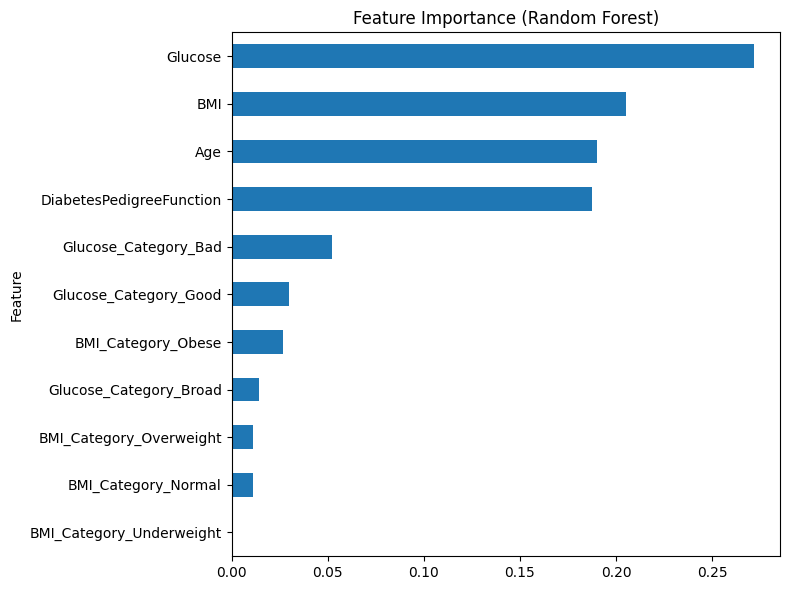

In [28]:

# After training `rf`
importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
importance_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), legend=False)
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Random Forest Classifier with Feature Engineering

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# 1. Define features and target
selected_features = [
    'Age', 'BMI', 'Glucose', 'DiabetesPedigreeFunction',
    'BMI_Category_Underweight', 'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese',
    'Glucose_Category_Good', 'Glucose_Category_Broad', 'Glucose_Category_Bad'
]

X = df[selected_features]
y = df['Outcome']

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Predict
y_pred = rf.predict(X_test)

# 5. Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
[[80 19]
 [17 38]]


In [30]:
from sklearn.metrics import roc_auc_score

y_proba = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.82277318640955


# XGBoost with cross validation

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Features
selected_features = [
    'Age', 'BMI', 'Glucose', 'DiabetesPedigreeFunction',
    'BMI_Category_Underweight', 'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese',
    'Glucose_Category_Good', 'Glucose_Category_Broad', 'Glucose_Category_Bad'
]
# Default features
default_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


X = df[selected_features]
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.74
ROC-AUC: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Confusion Matrix:
[[76 23]
 [17 38]]


In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score


X = df[selected_features]
y = df['Outcome']

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

# Stratified k-fold for balanced splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use accuracy as scoring metric
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=skf,
                           verbose=2,
                           n_jobs=-1)

# Run grid search
grid_search.fit(X, y)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Best score
print(f"Best cross-validated accuracy: {grid_search.best_score_:.3f}")



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Best cross-validated accuracy: 0.780


#Random Forest with SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score

# 1. Balance the training data with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 2. Filter valid RandomForest parameters if grid_search.best_params_ comes from another model
rf_valid_keys = RandomForestClassifier().get_params().keys()
rf_params = {k: v for k, v in grid_search.best_params_.items() if k in rf_valid_keys}

# 3. Train Random Forest on balanced data
rf_bal = RandomForestClassifier(**rf_params, random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)

# 4. Get predicted probabilities for test set
y_proba = rf_bal.predict_proba(X_test)[:, 1]

# 5. Try different thresholds to improve recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Pick a threshold to balance recall and precision (example: 0.4)
threshold = 0.47
y_pred_thresh = (y_proba >= threshold).astype(int)

# 6. Evaluate
print(f"Accuracy (threshold {threshold}): {accuracy_score(y_test, y_pred_thresh):.3f}")
print(classification_report(y_test, y_pred_thresh))
print(confusion_matrix(y_test, y_pred_thresh))


Accuracy (threshold 0.47): 0.773
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        99
           1       0.64      0.82      0.72        55

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.80      0.77      0.78       154

[[74 25]
 [10 45]]


In [34]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(**rf_params, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the entire pipeline
joblib.dump(pipeline, 'rf_full_pipeline.pkl')

# Load it later like this:
# pipeline = joblib.load('rf_full_pipeline.pkl')

# Predict as usual
# y_pred = pipeline.predict(X_test)


['rf_full_pipeline.pkl']